<h1 align="center">Naive Bayes Classifier Algorithm</h1>

<h2 align="center">Spam Email Classifier</h2>

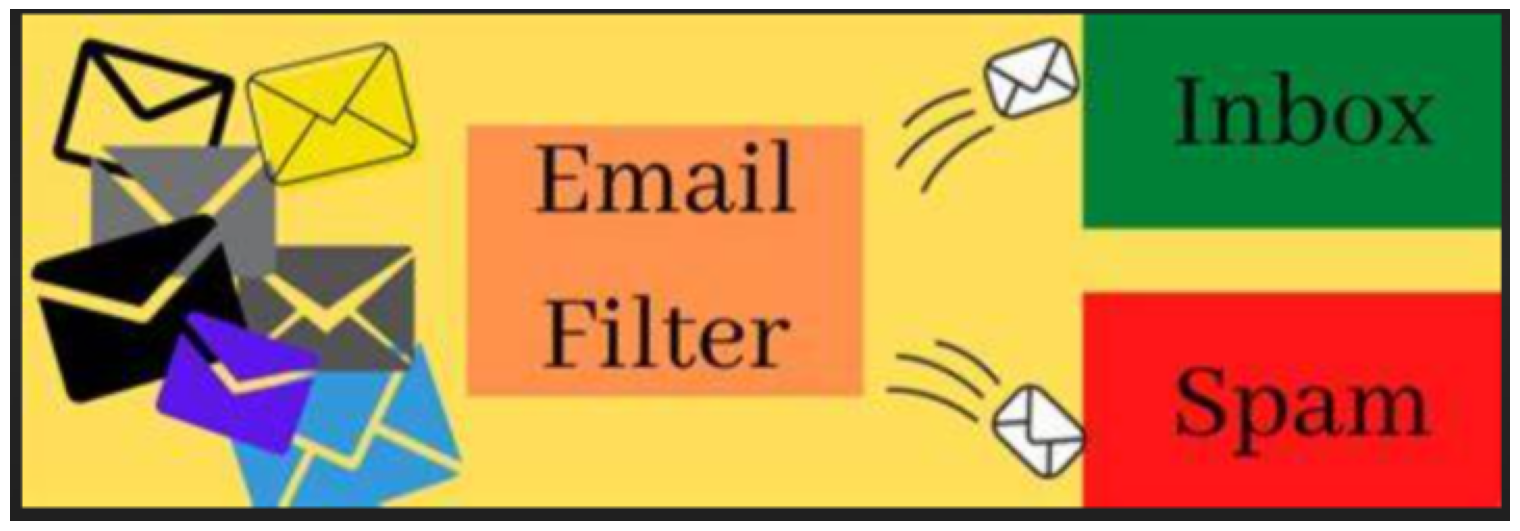

In [451]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'spamornotspam.png'  # Replace with your image path
image = Image.open(image_path)

# Create a new figure with a specified size
fig, ax = plt.subplots(figsize=(15, 15))  # Adjust figsize as needed

# Display the image
ax.imshow(image)

# Hide axes
ax.axis('off')

# Center the image in the figure
ax.set_aspect('equal')  # Ensure aspect ratio is equal to avoid distortion
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust spacing to fit the figure

# Show the image
plt.show()


In [247]:
import pandas as pd

In [248]:
df=pd.read_csv('spam.csv')

In [249]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [250]:
#Data Cleaning


In [251]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [252]:
df['Spam']=df['Category'].apply(lambda x:1 if x=="spam" else 0)
df

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


<h1 align="center">Train Test Spliting </h1>

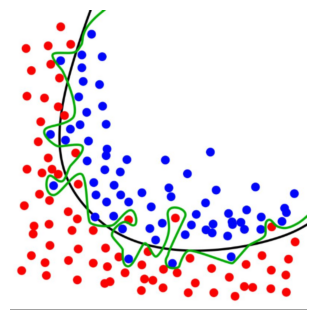

In [479]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'train.png'  # Replace with your image path
image = Image.open(image_path)

# Create a new figure with a specified size
fig, ax = plt.subplots(figsize=(3, 3))  # Adjust figsize as needed

# Display the image
ax.imshow(image)

# Hide axes
ax.axis('off')

# Center the image in the figure
ax.set_aspect('equal')  # Ensure aspect ratio is equal to avoid distortion
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust spacing to fit the figure

# Show the image
plt.show()


In [478]:
from sklearn.model_selection import train_test_split

In [254]:
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.2)

<h1 align="center">Count Vectorizer to Count Document Frequencies</h1>

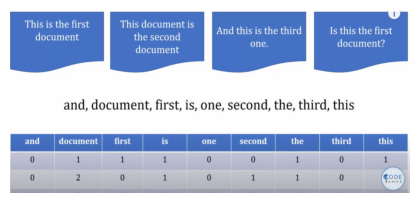

In [482]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'count.png'  # Replace with your image path
image = Image.open(image_path)

# Create a new figure with a specified size
fig, ax = plt.subplots(figsize=(4, 6))  # Adjust figsize as needed

# Display the image
ax.imshow(image)

# Hide axes
ax.axis('off')

# Center the image in the figure
ax.set_aspect('equal')  # Ensure aspect ratio is equal to avoid distortion
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust spacing to fit the figure

# Show the image
plt.show()


In [256]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(x_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [257]:
train.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<h1 align="center">MultibioNomil Classifier to Predict Spam is Spam or Not Spam </h1> 

In [259]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [260]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'Faislabad Damal offer ',
    'Packege',
    'Free entry in 2 a wkly comp to win FA Cup final',
    'upto 30% discount free Demal offer',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'

]
emails_count = v.transform(emails)
emails_count

<8x7728 sparse matrix of type '<class 'numpy.int64'>'
	with 64 stored elements in Compressed Sparse Row format>

In [261]:
result=model.predict(emails_count)

In [262]:
result

array([0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [263]:
emails_count = v.transform(df.Message)
emails_count

<5572x7728 sparse matrix of type '<class 'numpy.int64'>'
	with 73052 stored elements in Compressed Sparse Row format>

In [264]:
x_test_count = v.transform(x_test)
model.score(x_test_count, y_test)

0.9802690582959641

<h1 align="center">Avoids data leakage during training Pipeline being Used</h1>

In [438]:
from sklearn.pipeline import Pipeline

In [439]:
clf=Pipeline([
    ('countvector',CountVectorizer()),
    ('nb',MultinomialNB())
])

<h1 align="center">Facilitates grid search and cross-validation.
</h1>

In [267]:
clf.fit(x_train,y_train)

Pipeline(steps=[('countvector', CountVectorizer()), ('nb', MultinomialNB())])

In [268]:
clf.predict(emails)

array([0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [269]:
clf.score(x_test,y_test)

0.9802690582959641

<h1 align="center">Naive Bayes  Predicting survival from titanic crash</h1>

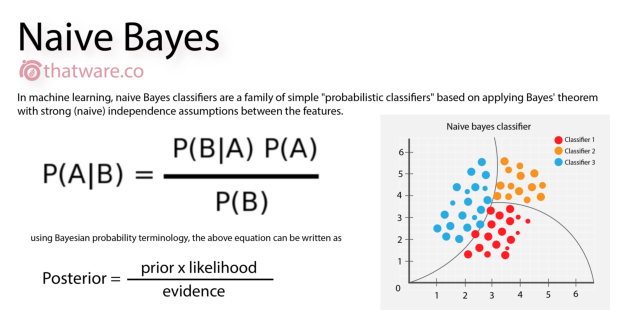

In [483]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'naive.png'  # Replace with your image path
image = Image.open(image_path)

# Create a new figure with a specified size
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize as needed

# Display the image
ax.imshow(image)

# Hide axes
ax.axis('off')

# Center the image in the figure
ax.set_aspect('equal')  # Ensure aspect ratio is equal to avoid distortion
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust spacing to fit the figure

# Show the image
plt.show()


In [309]:
import pandas as pd

In [385]:
df=pd.read_csv('titanic.csv')

In [386]:
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [387]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [388]:
x_input=df

In [389]:
x_input

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [390]:
y=df.Survived

In [391]:
x_input=x_input.drop('Survived',axis=1,inplace=True)

In [392]:
df

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [393]:
x=df

In [394]:
x['Sex']=x['Sex'].apply(lambda x:1 if x=='male' else 0)

In [395]:
x

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [396]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [397]:
df['Age']=df['Age'].fillna(df.Age.mean())

In [398]:
from sklearn.model_selection import train_test_split

In [399]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [400]:
x_train

,Pclass,Sex,Age,Fare
89,3,1,24.000000,8.0500
268,1,0,58.000000,153.4625
549,2,1,8.000000,36.7500
69,3,1,26.000000,8.6625
693,3,1,25.000000,7.2250
...,...,...,...,...
656,3,1,29.699118,7.8958
130,3,1,33.000000,7.8958
157,3,1,30.000000,8.0500
158,3,1,29.699118,8.6625


<h1 align="center">Gaussian Naive Bayes Algoorithm</h1>

In [402]:
from sklearn.naive_bayes import GaussianNB

In [403]:
model=GaussianNB()

In [420]:
model.fit(x_train,y_train)

GaussianNB()

In [430]:
model.predict(x_train)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,

In [431]:
model.score(x_test,y_test)

0.8156424581005587

In [437]:
model.predict_proba(x_test[:10])

array([[0.01996541, 0.98003459],
       [0.02945124, 0.97054876],
       [0.21192852, 0.78807148],
       [0.95893849, 0.04106151],
       [0.73953674, 0.26046326],
       [0.96041021, 0.03958979],
       [0.96200036, 0.03799964],
       [0.67702647, 0.32297353],
       [0.69818349, 0.30181651],
       [0.96217212, 0.03782788]])

<h1 align="center">Cross Validation</h1>

In [432]:
from sklearn.model_selection import cross_val_score

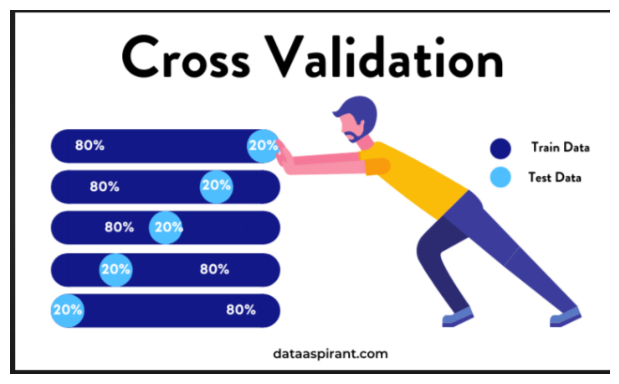

In [476]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'cross.png'  # Replace with your image path
image = Image.open(image_path)

# Create a new figure with a specified size
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize as needed

# Display the image
ax.imshow(image)

# Hide axes
ax.axis('off')

# Center the image in the figure
ax.set_aspect('equal')  # Ensure aspect ratio is equal to avoid distortion
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust spacing to fit the figure

# Show the image
plt.show()


In [484]:
cross_val_score(GaussianNB(),x_train,y_train,cv=3)

array([0.80252101, 0.76793249, 0.73839662])